<div style="text-align: center; font-size: 36px; font-weight: bold;">
    Stock Price Data Analysis
</div>

In [52]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [53]:
# glob is a package that is specifically used when you have to search some files which have some special kind of extension 
# or if it has some specific file pattern 
import glob

In [54]:
glob.glob(r'individual_stocks_5yr/*csv')

['individual_stocks_5yr/AAP_data.csv',
 'individual_stocks_5yr/ISRG_data.csv',
 'individual_stocks_5yr/HAS_data.csv',
 'individual_stocks_5yr/RJF_data.csv',
 'individual_stocks_5yr/RCL_data.csv',
 'individual_stocks_5yr/MMC_data.csv',
 'individual_stocks_5yr/CNP_data.csv',
 'individual_stocks_5yr/ETFC_data.csv',
 'individual_stocks_5yr/ABC_data.csv',
 'individual_stocks_5yr/BEN_data.csv',
 'individual_stocks_5yr/D_data.csv',
 'individual_stocks_5yr/LLY_data.csv',
 'individual_stocks_5yr/UAA_data.csv',
 'individual_stocks_5yr/MSFT_data.csv',
 'individual_stocks_5yr/EXR_data.csv',
 'individual_stocks_5yr/PGR_data.csv',
 'individual_stocks_5yr/USB_data.csv',
 'individual_stocks_5yr/AGN_data.csv',
 'individual_stocks_5yr/VRSK_data.csv',
 'individual_stocks_5yr/F_data.csv',
 'individual_stocks_5yr/SWK_data.csv',
 'individual_stocks_5yr/ALK_data.csv',
 'individual_stocks_5yr/ABT_data.csv',
 'individual_stocks_5yr/CMCSA_data.csv',
 'individual_stocks_5yr/LRCX_data.csv',
 'individual_stocks_5y

In [55]:
len(glob.glob(r'individual_stocks_5yr/*csv'))

505

In [56]:
company_list = [
    r'individual_stocks_5yr/MSFT_data.csv',
    r'individual_stocks_5yr/GOOG_data.csv',
    r'individual_stocks_5yr/AMZN_data.csv',
    r'individual_stocks_5yr/AAPL_data.csv'
]

In [57]:
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(file)
    all_data = pd.concat([current_df,all_data],ignore_index=True)

In [58]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


# Exploratory Data Analysis

In [59]:
all_data.shape

(4752, 7)

In [60]:
# Check for any missing values
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [61]:
# Checking Data types of the features.
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [62]:
# Converting the data type of the date column
all_data['date'] = pd.to_datetime(all_data['date'])

In [63]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [64]:
tech_list = all_data['Name'].unique()
tech_list

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

# Analysing Change in price of the stock overtime.


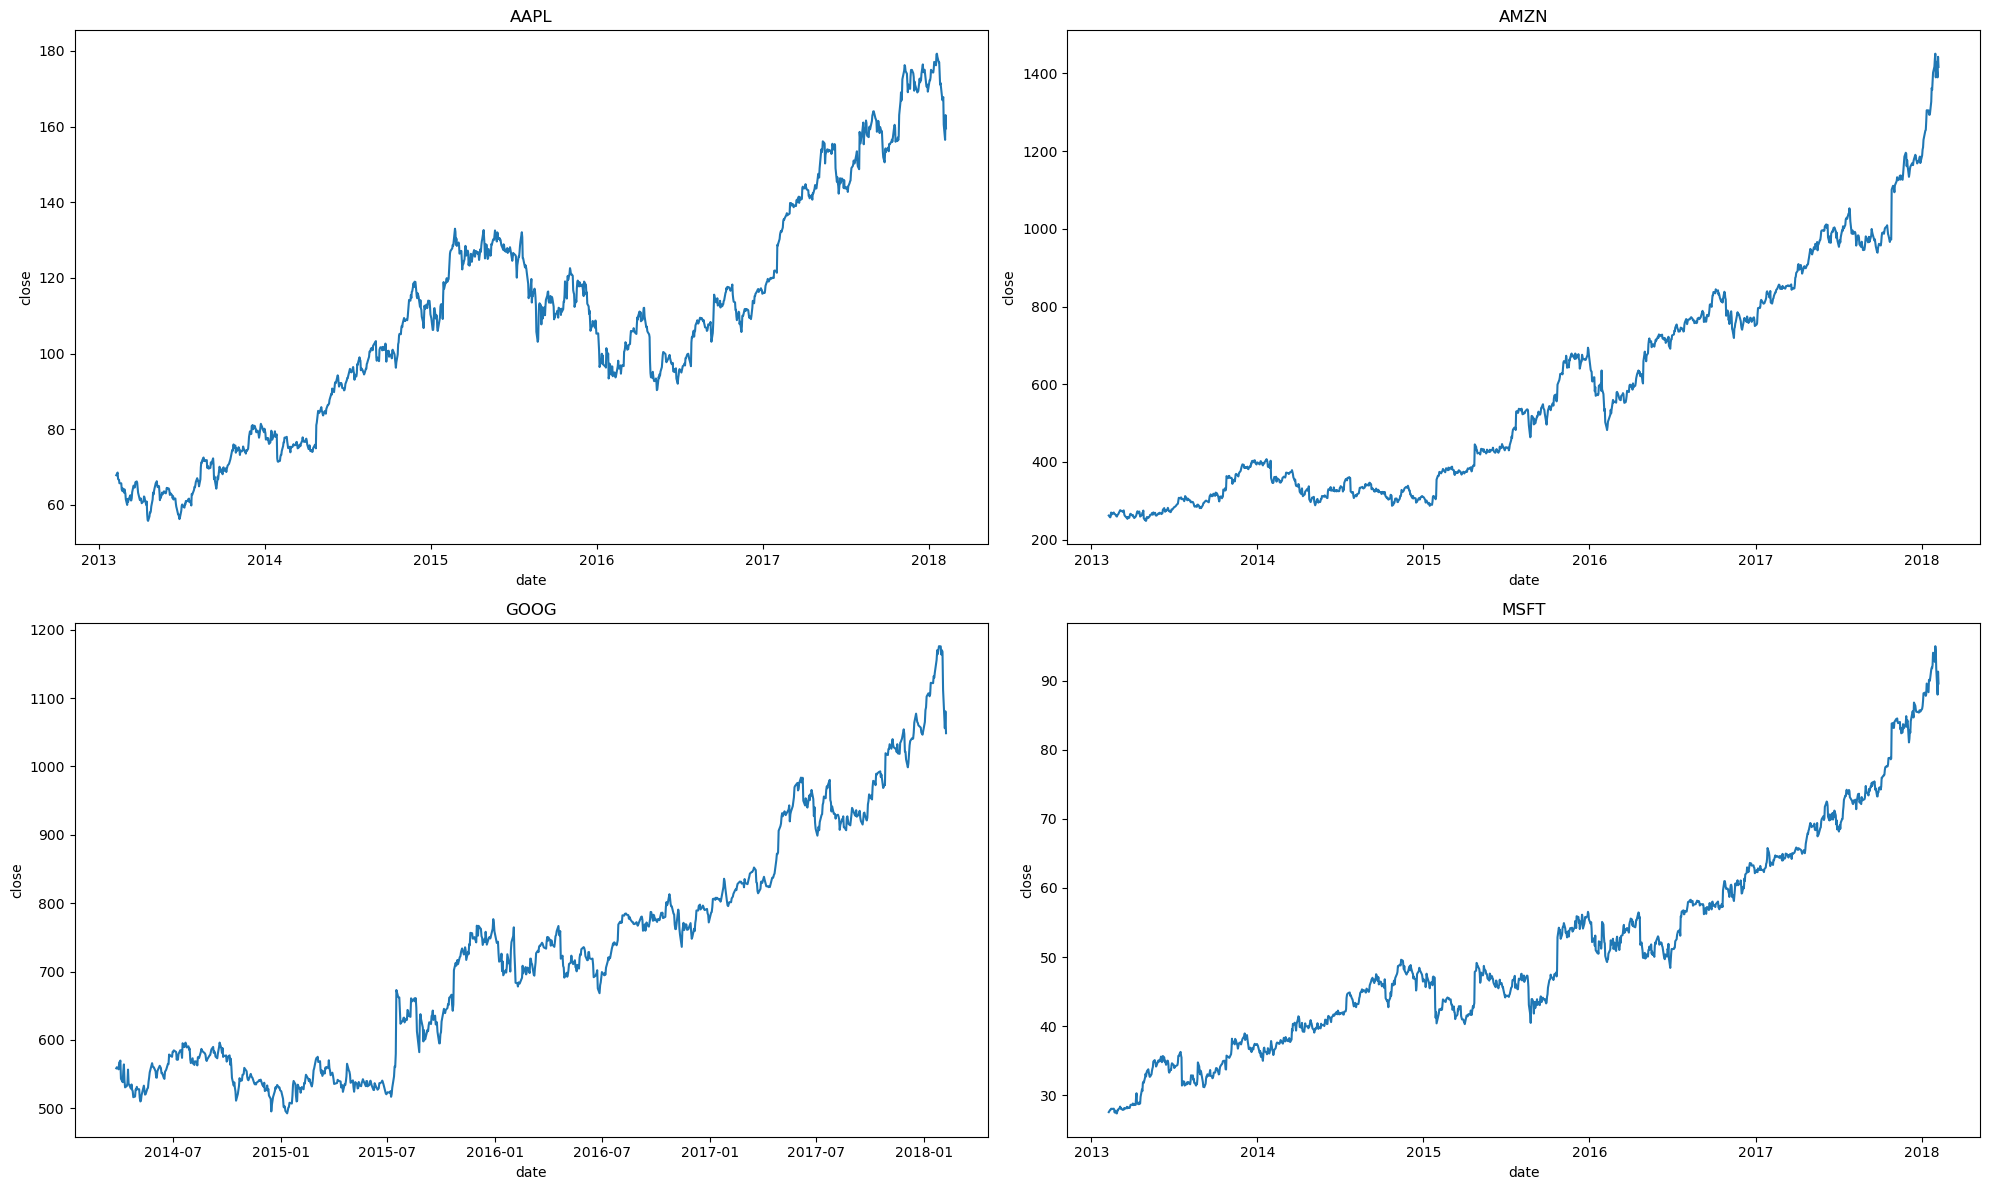

In [65]:
plt.figure(figsize=(20,12))
for index,company in enumerate(tech_list,1):
    plt.subplot(2,2,index)
    filter_df = all_data[all_data['Name']==company]
    sns.lineplot(x='date',y='close',data=filter_df)
    plt.title(company)
    
plt.tight_layout()
plt.show()

# Analysing Moving Average of the various stocks.


In [66]:
all_data['close'].rolling(window=10).mean().head(20)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     66.03251
10    65.57280
11    65.13051
12    64.79722
13    64.43137
14    63.91538
15    63.34238
16    62.93029
17    62.59903
18    62.37792
19    62.10520
Name: close, dtype: float64

In [67]:
# Lets consider different windows of rolling ,ie 10 days ,20 days ,30 days.
ma_days = [10,20,50]

for ma in ma_days:
    all_data['close_'+str(ma)] = all_data['close'].rolling(ma).mean()

In [68]:
new_data = all_data.copy()

In [69]:
new_data.set_index('date',inplace=True)

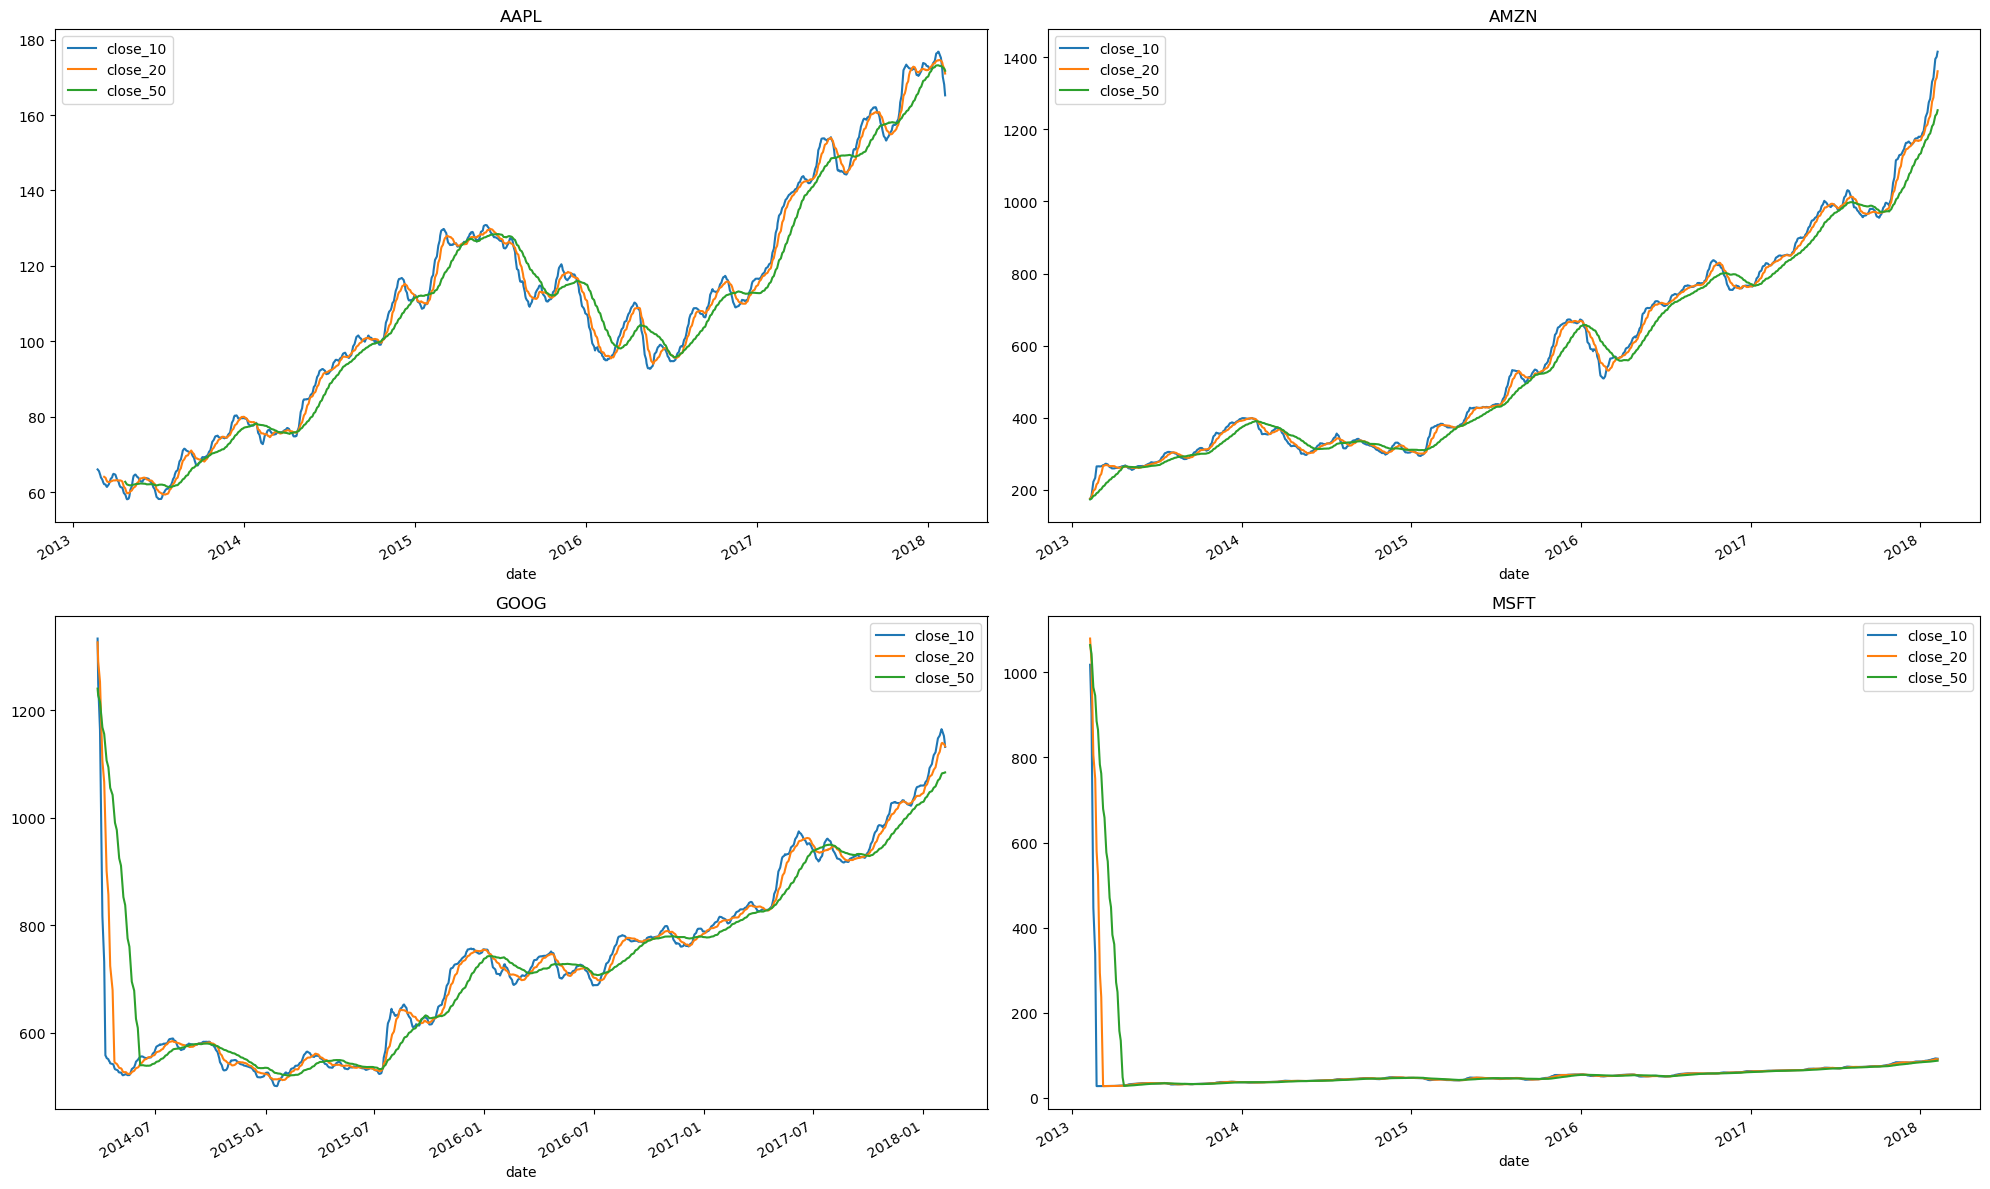

In [70]:
plt.figure(figsize=(20,12))
for index,company in enumerate(tech_list,1):
    plt.subplot(2,2,index)
    filter_df = new_data[new_data['Name']==company]
    filter_df[['close_10','close_20','close_50']].plot(ax=plt.gca())
    plt.title(company)
    
plt.tight_layout()
plt.show()

# Observing Closing Price change in Apple stock


In [74]:
apple_df = pd.read_csv(r'individual_stocks_5yr/AAPL_data.csv')
apple_df

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL


In [75]:
apple_df['close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

In [77]:
apple_df['Daily return (in %)'] = apple_df['close'].pct_change()*100

In [78]:
apple_df.head(10)

,date,open,high,low,close,volume,Name,Daily return (in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL,-1.377979
6,2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL,-0.036965
7,2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL,-2.421750
8,2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,AAPL,-0.621633
9,2013-02-22,64.1785,64.5142,63.7999,64.4014,82583823,AAPL,1.064925


In [82]:
import plotly.express as px
px.line(apple_df,x='date',y='Daily return (in %)')

# Performing resampling analysis of closing price.

In [84]:
apple_df['date'] =pd.to_datetime(apple_df['date'])

In [85]:
apple_df.set_index('date',inplace=True)

In [92]:
apple_df['close'].resample('M').mean() # Resample data on monthly basis

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

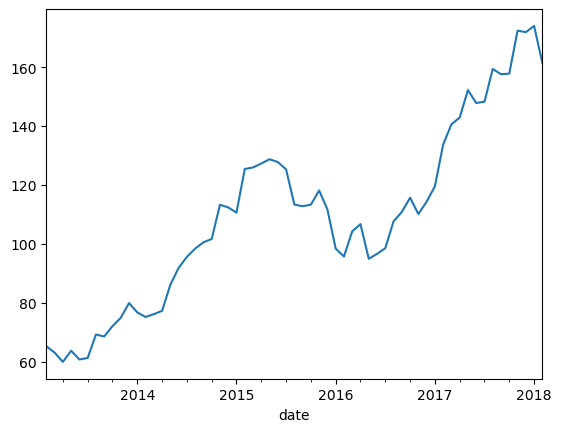

In [91]:
apple_df['close'].resample('M').mean().plot()

In [93]:
apple_df['close'].resample('Y').mean() # Resample data on yearly basis

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: A-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

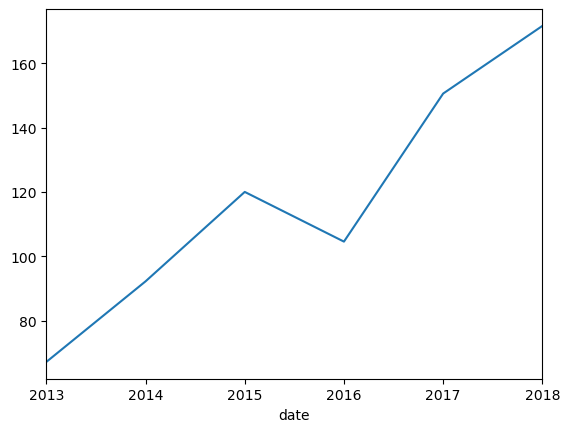

In [94]:
apple_df['close'].resample('Y').mean().plot()

In [96]:
apple_df['close'].resample('Q').mean() # Resample data on quarterly basis

date
2013-03-31     64.020291
2013-06-30     61.534692
2013-09-30     66.320670
2013-12-31     75.567478
2014-03-31     76.086293
2014-06-30     85.117475
2014-09-30     98.163311
2014-12-31    108.821016
2015-03-31    120.776721
2015-06-30    127.937937
2015-09-30    117.303438
2015-12-31    114.299297
2016-03-31     99.655082
2016-06-30     99.401250
2016-09-30    105.866094
2016-12-31    113.399048
2017-03-31    131.712500
2017-06-30    147.875397
2017-09-30    155.304603
2017-12-31    167.148254
2018-03-31    171.594231
Freq: Q-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

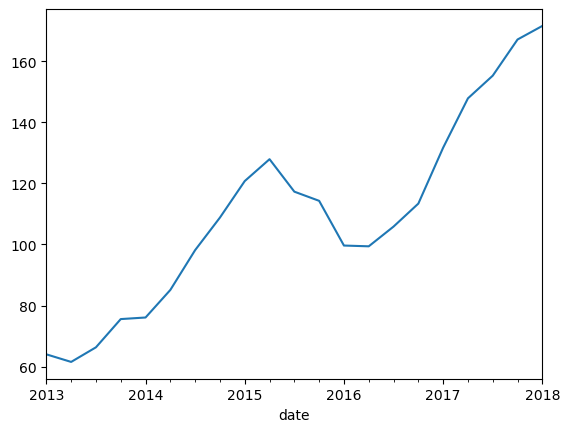

In [95]:
apple_df['close'].resample('Q').mean().plot()

# Checking Whether closing prices of these tech companies (Amazon,Apple,Google,Microsoft) are correlated or not !


In [98]:
apple = pd.read_csv(r'individual_stocks_5yr/AAPL_data.csv')
amazon = pd.read_csv(r'individual_stocks_5yr/AMZN_data.csv')
google = pd.read_csv(r'individual_stocks_5yr/GOOG_data.csv')
microsoft = pd.read_csv(r'individual_stocks_5yr/MSFT_data.csv')

In [99]:
closing_price = pd.DataFrame()

In [100]:
closing_price['apple_close'] = apple['close']
closing_price['amazon_close'] = amazon['close']
closing_price['google_close'] = google['close']
closing_price['microsoft_close'] = microsoft['close']

In [103]:
closing_price.corr()

,apple_close,amazon_close,google_close,microsoft_close
apple_close,1.000000,0.819078,0.640522,0.899689
amazon_close,0.819078,1.000000,0.888456,0.955977
google_close,0.640522,0.888456,1.000000,0.907011
microsoft_close,0.899689,0.955977,0.907011,1.000000


<Axes: >

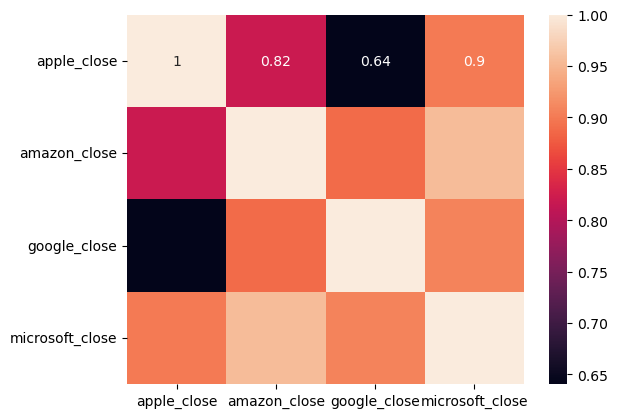

In [106]:
sns.heatmap(closing_price.corr(),annot=True)

Conclusions : 

    Closing price of Google and Microsoft are well correlated
    & Closing price of Amazon and Microsoft have a co-relation of 0.96

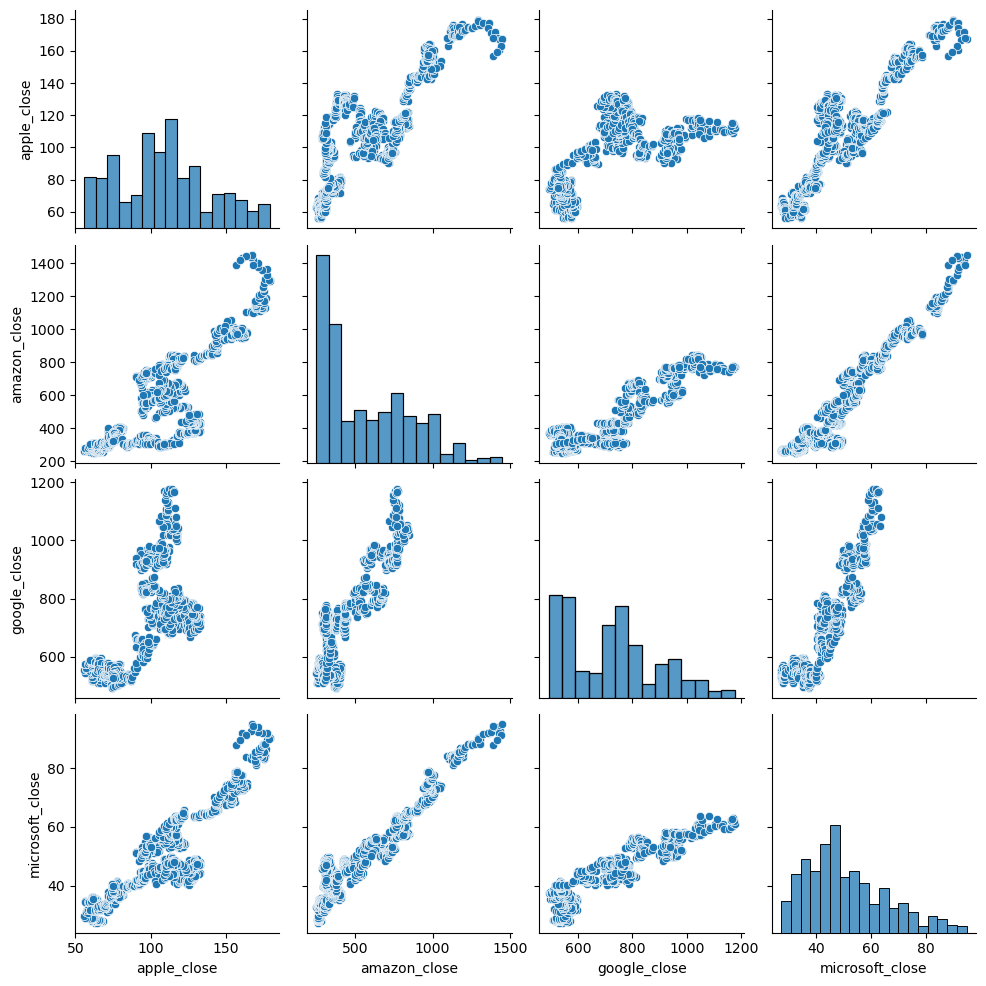

In [102]:
sns.pairplot(closing_price)

# Analyse Whether Daily change in Closing price of stocks or Daily Returns in Stock are co-related or not !


In [107]:
closing_price

,apple_close,amazon_close,google_close,microsoft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


In [108]:
for col in closing_price.columns:
    closing_price[col+'_pct_change'] = (closing_price[col] - closing_price[col].shift(1))/closing_price[col].shift(1) *100

In [114]:
closing_p = closing_price[['apple_close_pct_change','amazon_close_pct_change','google_close_pct_change','microsoft_close_pct_change']]

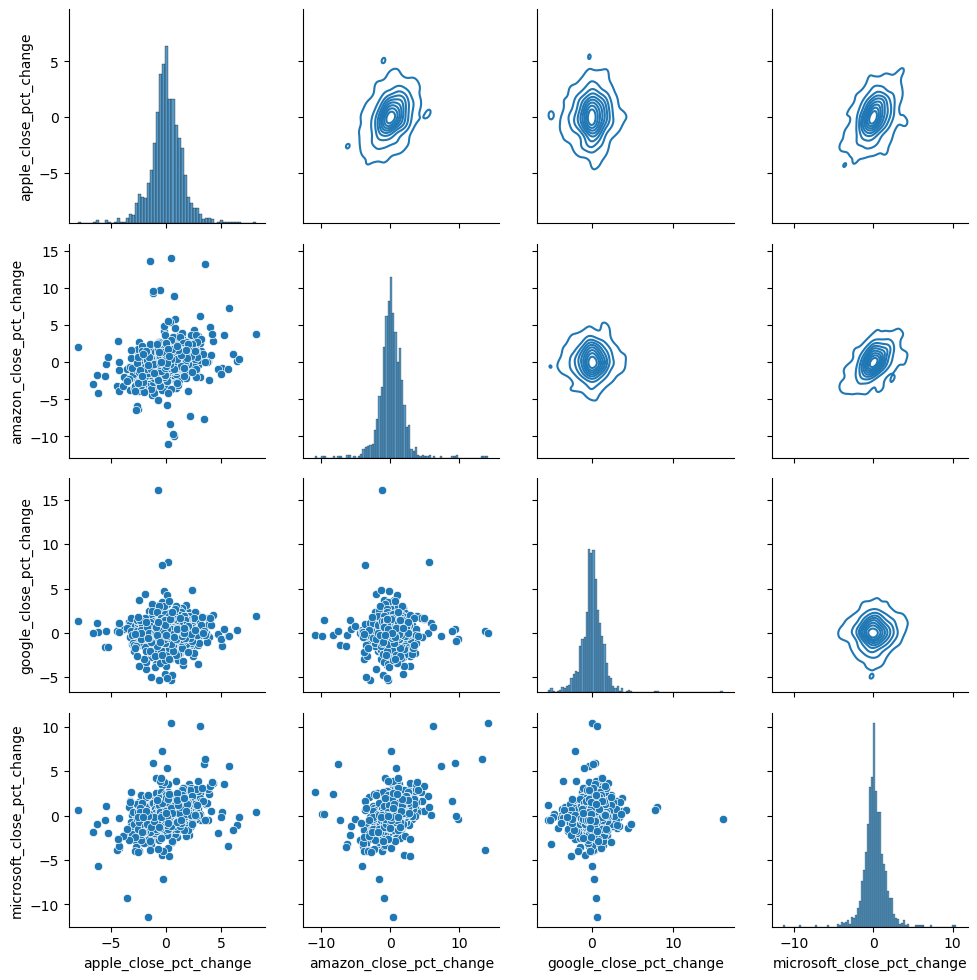

In [ ]:
g = sns.PairGrid(data=closing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

Conclusion :

    While Comparing 'AAPL_close_pct_change' to 'AMZN_close_pct_change'  , it shows a linear relationship upto some extent.


In [115]:
closing_p.corr()

,apple_close_pct_change,amazon_close_pct_change,google_close_pct_change,microsoft_close_pct_change
apple_close_pct_change,1.000000,0.287659,0.036202,0.366598
amazon_close_pct_change,0.287659,1.000000,0.027698,0.402678
google_close_pct_change,0.036202,0.027698,1.000000,0.038939
microsoft_close_pct_change,0.366598,0.402678,0.038939,1.000000
